# Confronto tra le due stime
Di seguito, confrontiamo la stima pessimistica (PP) e quella ottimistica (PO). PP è stata usata per avere una stima e selezionare gli esperimenti da eseguire per la generazione del dataset. Entrambe le stime sono basate su una proporzione rispetto al tempo di esecuzione medio del modello operativo COSMO-2I; la differenza consiste nel fatto che quella pessimistica prende come riferimento il tempo di esecuzione della prima ora di previsione (più alta), mentre quella ottimistica usa il tempo di esecuzione della seconda ora di previsione. Di seguito, vediamo come PO sia più precisa, di conseguenza useremo questa come confronto per i modelli DL.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

df = pd.read_csv("fixed_area_results.csv")

In [2]:
df["estimated_duration_2"] = 59.8 * (20/df.grid_step) * (df.ni*df.nj/403776) * (864/df.n_procs) * (1 - 0.3*df.single_precision)

In [3]:
df["estimated_duration_1"] = df["estimated_duration"]
df = df.drop("estimated_duration", axis=1)

In [4]:
df["abs_err_1"] = (df["time2"] - df["estimated_duration_1"]).abs()
df["rel_err_1"] = df["abs_err_1"]/df["time2"]
df["abs_err_2"] = (df["time2"] - df["estimated_duration_2"]).abs()
df["rel_err_2"] = df["abs_err_2"]/df["time2"]

In [5]:
df[["abs_err_1", "rel_err_1", "abs_err_2", "rel_err_2"]].describe()

,abs_err_1,rel_err_1,abs_err_2,rel_err_2
count,5758.000000,5758.000000,5758.000000,5758.000000
mean,11.502797,0.418716,6.889976,0.276293
std,16.786334,0.311574,10.904716,0.202344
min,0.000418,0.000243,0.000980,0.000062
25%,0.593060,0.161499,0.523465,0.111445
50%,4.227947,0.342728,1.991186,0.240292
75%,16.182460,0.640051,8.910396,0.404210
max,130.507180,1.401572,83.890102,0.994639


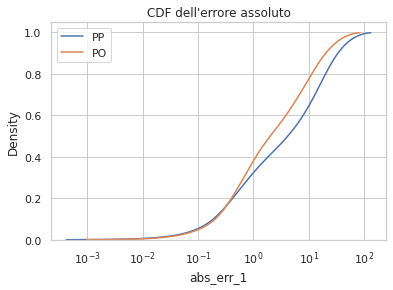

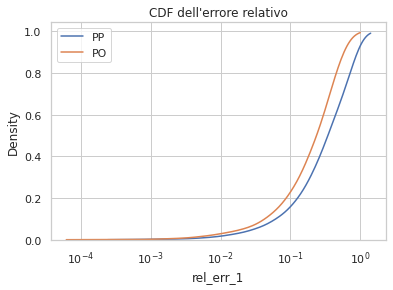

In [6]:
sns.kdeplot(data=df, x="abs_err_1", log_scale=True, cumulative=True, cut=0, label="PP")
sns.kdeplot(data=df, x="abs_err_2", log_scale=True, cumulative=True, cut=0, label="PO")
plt.title("CDF dell'errore assoluto")
plt.legend()
plt.show()

sns.kdeplot(data=df, x="rel_err_1", log_scale=True, cumulative=True, cut=0, label="PP")
sns.kdeplot(data=df, x="rel_err_2", log_scale=True, cumulative=True, cut=0, label="PO")
plt.title("CDF dell'errore relativo")
plt.legend()
plt.show()